In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/9ad03d45b78bef0fe159c09aef98bda55e72a4bc59168beba135db95.csv')
df.head()

,ID,Date,Element,Data_Value
0,USC00048713,2006-08-19,TMAX,328
1,USR0000CGZF,2005-02-04,TMAX,156
2,USR0000CPIL,2011-11-30,TMAX,178
3,USR0000CLIN,2014-10-10,TMAX,311
4,USC00046962,2011-08-31,TMIN,161


In [2]:
import datetime
df['Date']=pd.to_datetime(df['Date'])

df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['Data_Value']=df['Data_Value']*.1
df['Data_Value'].head()

0    32.8
1    15.6
2    17.8
3    31.1
4    16.1
Name: Data_Value, dtype: float64

In [3]:
import numpy as np

days=[31,28,31,30,31,30,31,31,30,31,30,31]
months=[1,2,3,4,5,6,7,8,9,10,11,12]
minTemp=[]
maxTemp=[]
minX=[]
minY=[]
maxX=[]
maxY=[]
i=0

for m in months:
    for d in range(days[m-1]):
        temp=df[(df['day']==d+1) & (df['month']==m) & (df['year']!=2015)]
        tmax=temp[temp['Element']=='TMAX']
        tmin=temp[temp['Element']=='TMIN']
        dayMax=(np.max(tmax['Data_Value']))
        dayMin=(np.min(tmin['Data_Value']))
        minTemp.append(dayMin)
        maxTemp.append(dayMax)
        temp=df[(df['day']==d+1) & (df['month']==m) & (df['year']==2015)]
        max15=temp[temp['Element']=='TMAX']
        min15=temp[temp['Element']=='TMIN']
        if (np.max(max15['Data_Value'])) > dayMax:
            maxX.append(np.max(max15['Data_Value']))
            maxY.append(i)
        if (np.min(min15['Data_Value']))< dayMin:
            minX.append(np.min(min15['Data_Value']))
            minY.append(i)
        i=i+1

In [4]:
%matplotlib notebook

In [5]:
import matplotlib as mpl

<IPython.core.display.Javascript object>


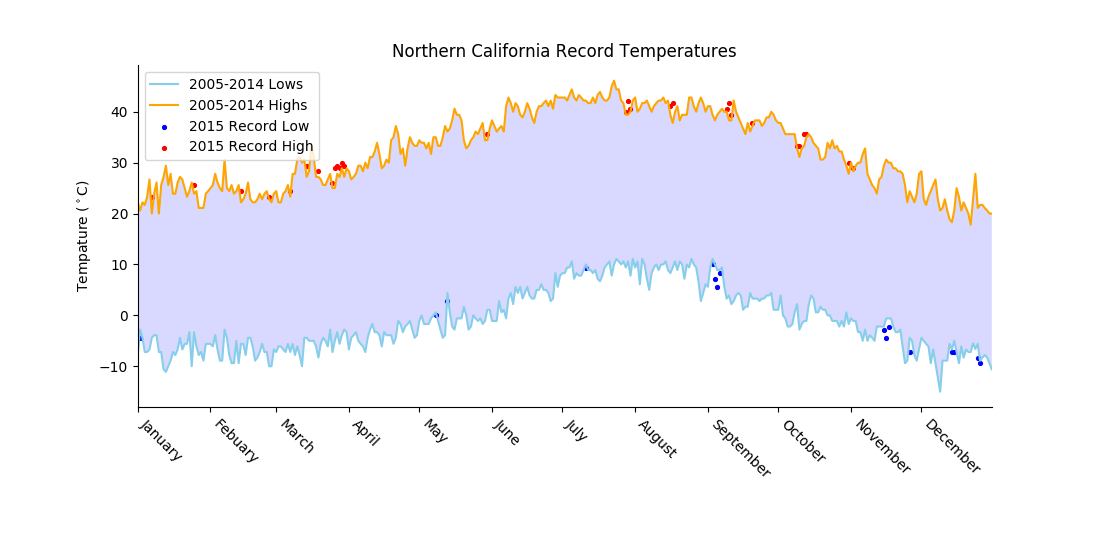

In [6]:
fig=plt.figure(figsize=(12,6))
# plot the line charts and scatter plots

plt.plot(minTemp, 'skyblue', maxTemp, 'orange')
plt.scatter(minY, minX, c='blue', marker='.', s=30)
plt.scatter(maxY, maxX, c='red', marker='.', s=30)

In [7]:
#fill area between 2 lines
plt.gca().fill_between(range(len(minTemp)), 
                       minTemp, maxTemp, 
                       facecolor='blue', 
                       alpha=0.15)

In [8]:
i=0
ticks=[]
ticks.append(i)
for m in days:
    i= i+m
    ticks.append(i)

#Drop last value    
ticks=ticks[:-1]

In [9]:
names=['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks, names)
ax = fig.add_subplot(111)
ax.set_xlim(0, 364)

(0, 364)

In [10]:
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(-45)
    item.set_horizontalalignment("left")



In [11]:
plt.ylabel('Tempature ($^\circ$C)')
plt.title('Northern California Record Temperatures')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Max', 'Min'])
plt.legend(['2005-2014 Lows', '2005-2014 Highs', '2015 Record Low', '2015 Record High'], loc=0)
plt.subplots_adjust(bottom=0.25)

In [12]:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)